In [8]:
# import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from entity_tagging import entity_tagging
from sklearn.metrics import confusion_matrix

In [13]:
# read dataset from excel
data_path = '../message_modified_v1.2.xlsx'
data = pd.read_excel(data_path)

# Rename columns
data = data.rename(columns={"msg": "content", "class": "label"})
data['content'] = data['content'].astype(str)
data['content'] = entity_tagging(data['content'])
data.loc[:, 'label'] = data.label.map({'ham': 0, 'spam': 1})

In [14]:
data['content']

0                                            vẫn như cũ á
1       k bạn ơi mk đang dùng gói f16 bên bạn thấy bảo...
2                          nhà anh dùng truền hình số fpt
3                   mình đang bận chắc cho kĩ thuật qua à
4                                             đúng rồi em
                              ...                        
6305    bh chartis nh acb se tien hanh thu phi bao hie...
6306    chuc mung sinh nhat quy khach chuc quy khach s...
6307    nhan ngay number number number that dac biet n...
6308    hay vao vietnamgottalent vn de tham gia binh c...
6309    “tên shop” đang có chương trình khuyến mãi mua...
Name: content, Length: 6310, dtype: object

In [15]:
# Split of training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['label'], test_size=0.2, random_state=1)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Build CountVectorizer and transform data
count_vectorizer = CountVectorizer()
training_data = count_vectorizer.fit_transform(X_train)
testing_data = count_vectorizer.transform(X_test)

# Naive Bayes model training
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

# Evaluate the model on the test set
predictions = naive_bayes.predict(testing_data)
print(classification_report(y_test, predictions))

# Save model and CountVectorizer
joblib.dump(naive_bayes, '../naive_bayes_model.pkl')
joblib.dump(count_vectorizer, '../count_vectorizer.pkl')


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1060
           1       0.87      0.89      0.88       202

    accuracy                           0.96      1262
   macro avg       0.92      0.93      0.93      1262
weighted avg       0.96      0.96      0.96      1262



['../count_vectorizer.pkl']

In [16]:
# Spam or ham prediction function for a piece of text
def predict_spam_or_ham(input_string):
    # Load the trained model and CountVectorizer
    naive_bayes = joblib.load('../naive_bayes_model.pkl')
    count_vectorizer = joblib.load('../count_vectorizer.pkl')
    # Preprocess the input string
    preprocessed_input = count_vectorizer.transform([input_string])
    # Make the prediction
    prediction = naive_bayes.predict(preprocessed_input)
    return prediction[0]
# test
input_text = "Mung le 2/9, eSMS giảm dong loat 10% cho moi doanh nghiep su dung cac san pham (tên sản phẩm). Thoi gian ap dung ke tu ngay 25/8 - 31/8. Xem chi tiet tai (link)."
prediction = predict_spam_or_ham(input_text)
print(f"Prediction: {'ham' if prediction == 0 else 'spam'}")

Prediction: spam


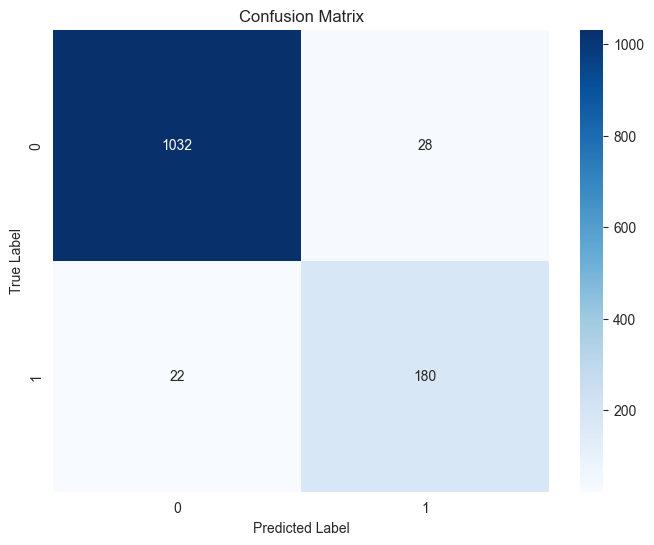

Accuracy: 0.9603803486529319
Precision: 0.8653846153846154
Recall: 0.8910891089108911
Specificity: 0.9735849056603774
F1 Score: 0.878048780487805


In [17]:

# calculator confusion matrix
cm = confusion_matrix(y_test, predictions)

# Draw a confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# calculator confusion matrix
cm = confusion_matrix(y_test, predictions)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

total_samples = len(y_test)
accuracy = (TP + TN) / total_samples
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
